In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys, os

# Add the utils folder to the path
sys.path.append(os.path.abspath("../"))

# Import custom function
from utils.reservoir_api import get_top_collections

# Fetch top 20 popular NFT collections
data = get_top_collections(limit=20)

# Create DataFrame
df = pd.DataFrame(data)

# Extract total trading volume
df["total_volume"] = df["volume"].apply(lambda v: v.get("allTime", 0) if isinstance(v, dict) else 0)

# Get floor price (ETH) from floorAsk
def extract_floor_price(item):
    try:
        return item["floorAsk"]["price"]["amount"]["decimal"]
    except (TypeError, KeyError):
        return None

df["floor_price"] = df.apply(extract_floor_price, axis=1)
df_display = df[["name", "total_volume", "floor_price"]]

# Display top 10 after sorting
df_display = df_display.sort_values(by="total_volume", ascending=False).head(10)

display(df_display)






,name,total_volume,floor_price
0,Bored Ape Yacht Club,1.728766e+06,10.81999
1,CryptoPunks,1.322392e+06,38.89000
2,Mutant Ape Yacht Club,1.188882e+06,1.70300
3,Azuki,9.109975e+05,1.92924
4,Otherdeed for Otherside,6.808220e+05,0.17540
5,Pudgy Penguins,5.357306e+05,9.70000
6,CLONE X - X TAKASHI MURAKAMI,4.372961e+05,0.13600
7,Moonbirds,3.805963e+05,0.67000
8,Doodles,3.760237e+05,1.00694
9,Bored Ape Kennel Club,2.887727e+05,0.36470


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys, os

# Add the utils folder to the path
sys.path.append(os.path.abspath("../"))

# Import custom function
from utils.reservoir_api import get_top_collections

# Fetch top 20 popular NFT collections
data = get_top_collections(limit=20)

# Create DataFrame
df = pd.DataFrame(data)

# Extract total trading volume
df["total_volume"] = df["volume"].apply(lambda v: v.get("allTime", 0) if isinstance(v, dict) else 0)

# 從 floorAsk 結構中取出地板價（ETH）
def extract_floor_price(item):
    try:
        return item["floorAsk"]["price"]["amount"]["decimal"]
    except (TypeError, KeyError):
        return None

df["floor_price"] = df.apply(extract_floor_price, axis=1)

# 🌟 只保留要看的欄位
df_display = df[["name", "total_volume", "floor_price"]]

# 排序後顯示前 10 名
df_display = df_display.sort_values(by="total_volume", ascending=False).head(10)

# 顯示乾淨的榜單
display(df_display)






,name,total_volume,floor_price
0,Bored Ape Yacht Club,1.728766e+06,10.81999
1,CryptoPunks,1.322392e+06,38.89000
2,Mutant Ape Yacht Club,1.188882e+06,1.70300
3,Azuki,9.109975e+05,1.92924
4,Otherdeed for Otherside,6.808220e+05,0.17540
5,Pudgy Penguins,5.357306e+05,9.70000
6,CLONE X - X TAKASHI MURAKAMI,4.372961e+05,0.13600
7,Moonbirds,3.805963e+05,0.67000
8,Doodles,3.760237e+05,1.00694
9,Bored Ape Kennel Club,2.887727e+05,0.36470


Leaderboard Visualization

/var/folders/v1/xds07jgs4vdbmkv6mszqj2jm0000gn/T/ipykernel_8759/2615049630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_display, x="total_volume", y="name", palette="Blues_r")


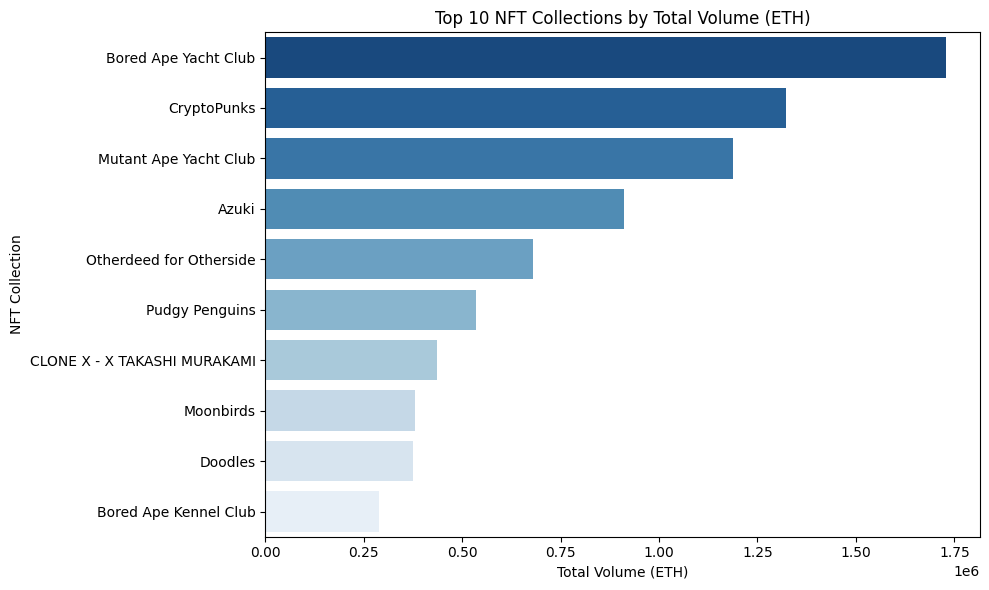

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_display, x="total_volume", y="name", palette="Blues_r")
plt.title("Top 10 NFT Collections by Total Volume (ETH)")
plt.xlabel("Total Volume (ETH)")
plt.ylabel("NFT Collection")
plt.tight_layout()
plt.show()
